In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('steam-games.csv')

In [4]:
df.head()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0


In [5]:
df.describe()

,app_id,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
count,4.249700e+04,42497.000000,42497.000000,42497.000000,40020.000000,4.002000e+04,5503.000000,5503.000000
mean,1.245812e+06,0.722004,0.055886,0.309528,77.162569,2.500621e+03,82.303107,282.100491
std,7.553906e+05,4.673810,0.229705,1.264100,17.672036,4.887980e+04,15.110260,4583.606042
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000e+01,6.000000,10.000000
25%,5.892200e+05,0.000000,0.000000,0.000000,68.000000,2.100000e+01,75.000000,16.000000
50%,1.144860e+06,0.000000,0.000000,0.000000,81.000000,5.900000e+01,86.000000,34.000000
75%,1.822640e+06,0.000000,0.000000,0.000000,91.000000,2.820000e+02,93.000000,102.000000
max,3.008050e+06,200.000000,1.000000,41.000000,100.000000,8.062218e+06,100.000000,328633.000000


In [6]:
df_num = df[['app_id','dlc_available', 'age_rating', 'awards', 'overall_review_%', 'overall_review_count', 'recent_review_%', 'recent_review_count']]
df_num.corr()

,app_id,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
app_id,1.000000,-0.055685,-0.123109,-0.084515,0.193253,-0.039836,-0.039081,-0.021463
dlc_available,-0.055685,1.000000,0.119921,0.043524,0.021020,0.058942,-0.034523,0.009093
age_rating,-0.123109,0.119921,1.000000,0.103073,-0.003272,0.058563,-0.089186,0.045497
awards,-0.084515,0.043524,0.103073,1.000000,0.096262,0.036578,0.084828,0.006937
overall_review_%,0.193253,0.021020,-0.003272,0.096262,1.000000,0.024610,0.776752,-0.009366
overall_review_count,-0.039836,0.058942,0.058563,0.036578,0.024610,1.000000,0.013106,0.290864
recent_review_%,-0.039081,-0.034523,-0.089186,0.084828,0.776752,0.013106,1.000000,-0.009642
recent_review_count,-0.021463,0.009093,0.045497,0.006937,-0.009366,0.290864,-0.009642,1.000000


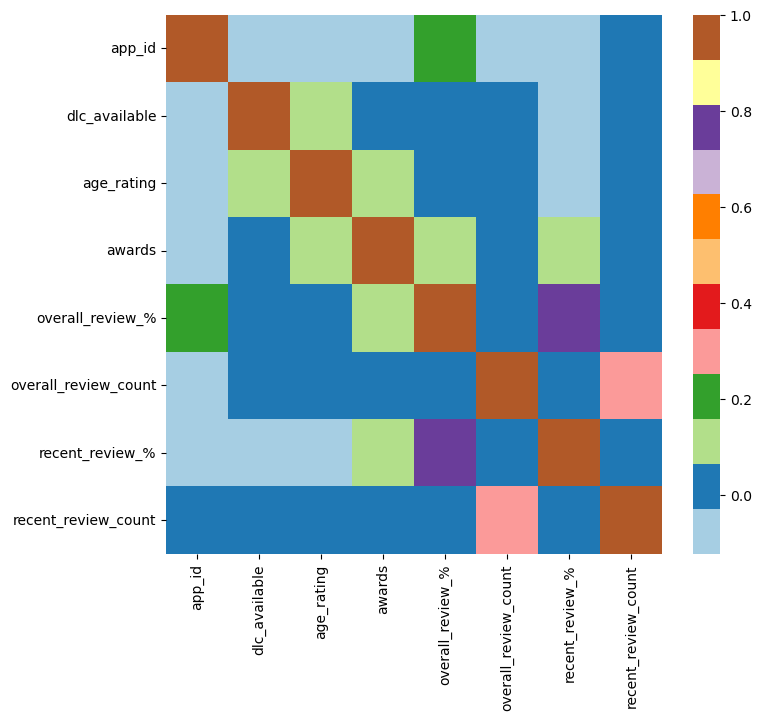

In [42]:
plt.figure(figsize=(8,7))
sns.heatmap(df_num.corr(), cmap='Paired')
plt.show()

The heatmap of correlation matrix of numerical columns

In [8]:
df.isnull().sum()

app_id                      0
title                       0
release_date               57
genres                     87
categories                 45
developer                 190
publisher                 211
original_price          37638
discount_percentage     37638
discounted_price          240
dlc_available               0
age_rating                  0
content_descriptor      40122
about_description         138
win_support                 0
mac_support                 0
linux_support               0
awards                      0
overall_review           2477
overall_review_%         2477
overall_review_count     2477
recent_review           36994
recent_review_%         36994
recent_review_count     36994
dtype: int64

There are quite a lot of Null Values in many columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   app_id                42497 non-null  int64  
 1   title                 42497 non-null  object 
 2   release_date          42440 non-null  object 
 3   genres                42410 non-null  object 
 4   categories            42452 non-null  object 
 5   developer             42307 non-null  object 
 6   publisher             42286 non-null  object 
 7   original_price        4859 non-null   object 
 8   discount_percentage   4859 non-null   object 
 9   discounted_price      42257 non-null  object 
 10  dlc_available         42497 non-null  int64  
 11  age_rating            42497 non-null  int64  
 12  content_descriptor    2375 non-null   object 
 13  about_description     42359 non-null  object 
 14  win_support           42497 non-null  bool   
 15  mac_support        

As we can see 6 columns have a very huge number of Null values, nearly 88% to 94%. These columns are not needed. Imputing them is also not necessary

In [33]:
df_new = df.copy()

In [34]:
df_new = df_new.drop(['original_price','content_descriptor','recent_review','recent_review_%','recent_review_count'],axis=1)

We removed the columns with huge number of null values

In [35]:
df_new.head()

,app_id,title,release_date,genres,categories,developer,publisher,discount_percentage,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,Free,1,0,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,Free,2,0,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,"₹3,999.00",0,1,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,"₹3,599.00",2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,Free,14,1,Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0


In [36]:
df_new.isnull().sum()

app_id                      0
title                       0
release_date               57
genres                     87
categories                 45
developer                 190
publisher                 211
discount_percentage     37638
discounted_price          240
dlc_available               0
age_rating                  0
about_description         138
win_support                 0
mac_support                 0
linux_support               0
awards                      0
overall_review           2477
overall_review_%         2477
overall_review_count     2477
dtype: int64

In [37]:
df_new.discounted_price.unique()

array(['Free', '₹3,999.00', '₹3,599.00', ..., '₹461.00', '₹1,075.00',
       '₹150,000.00'], dtype=object)

In [41]:
df_new.discount_percentage.unique()

array([nan, '-50%', '-40%', '-64%', '-75%', '-70%', '-20%', '-65%',
       '-25%', '-80%', '-85%', '-95%', '-30%', '-34%', '-84%', '-90%',
       '-60%', '-43%', '-66%', '-35%', '-68%', '-10%', '-100%', '-33%',
       '-29%', '-12%', '-77%', '-22%', '-67%', '-18%', '-55%', '-59%',
       '-62%', '-15%', '-56%', '-81%', '-37%', '-78%', '-21%', '-73%',
       '-61%', '-45%', '-36%', '-44%', '-51%', '-39%', '-28%', '-88%',
       '-76%', '-38%', '-54%', '-52%', '-23%', '-72%', '-89%', '-71%',
       '-86%', '-48%', '-24%', '-46%', '-17%', '-63%', '-27%', '-79%',
       '-82%', '-47%', '-74%', '-87%', '-83%', '-93%', '-49%', '-26%',
       '-42%', '-41%', '-31%', '-57%', '-91%', '-97%', '-92%', '-32%',
       '-94%', '-99%', '-53%', '-98%', '-19%', '-69%', '-96%', '-14%',
       '-58%', '-11%', '-13%'], dtype=object)